# Analísis Exploratorio

In [ ]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Snowflake connection
snowflake_conn = snowflake.connector.connect(
    user=os.getenv("SNOWFLAKE_USER"),
    password=os.getenv("SNOWFLAKE_PASSWORD"),
    account=os.getenv("SNOWFLAKE_ACCOUNT"),
    warehouse=os.getenv("SNOWFLAKE_WAREHOUSE"),
    database='INSTACART_DB',
    schema='RAW'
)

In [5]:
# Función para obtener datos
def get_data(tabla):
    query = f'SELECT * FROM {tabla}'
    return pd.read_sql(query, snowflake_conn)  

In [6]:
df_aisles = get_data('AISLES')
df_departments = get_data('DEPARTMENTS')
df_instacart_orders = get_data('INSTACART_ORDERS')
df_order_products = get_data('ORDER_PRODUCTS')
df_products = get_data('PRODUCTS')

/var/folders/sy/fk_t21qs7qv3xc99jxz4q50m0000gn/T/ipykernel_16882/3036904347.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, snowflake_conn)


In [7]:
snowflake_conn.close()

### Dimensión de datos

In [8]:
# Filas y columnas
print('aisles: ', df_aisles.shape)
print('departments: ', df_departments.shape)
print('instacart_orders: ', df_instacart_orders.shape)
print('order_products: ', df_order_products.shape)
print('products: ', df_products.shape)


aisles:  (134, 2)
departments:  (21, 2)
instacart_orders:  (478967, 6)
order_products:  (4545007, 4)
products:  (49694, 4)


In [9]:
# Name of the columns
print('aisles: ', df_aisles.columns)
print('departments: ', df_departments.columns)
print('instacart_orders: ', df_instacart_orders.columns)
print('order_products: ', df_order_products.columns)
print('products: ', df_products.columns)


aisles:  Index(['AISLE_ID', 'AISLE'], dtype='object')
departments:  Index(['DEPARTMENT_ID', 'DEPARTMENT'], dtype='object')
instacart_orders:  Index(['ORDER_ID', 'USER_ID', 'ORDER_NUMBER', 'ORDER_DOW', 'ORDER_HOUR_OF_DAY',
       'DAYS_SINCE_PRIOR_ORDER'],
      dtype='object')
order_products:  Index(['ORDER_ID', 'PRODUCT_ID', 'ADD_TO_CART_ORDER', 'REORDERED'], dtype='object')
products:  Index(['PRODUCT_ID', 'PRODUCT_NAME', 'AISLE_ID', 'DEPARTMENT_ID'], dtype='object')


In [78]:
print('aisles\n', df_aisles.head(3))
print('departments\n', df_departments.head(3))
print('instacart_orders\n', df_instacart_orders.head(3))
print('order_products\n', df_order_products.head(3))
print('products\n', df_products.head(3))

aisles
    AISLE_ID                  AISLE
0         1  prepared soups salads
1         2      specialty cheeses
2         3    energy granola bars
departments
    DEPARTMENT_ID DEPARTMENT
0              1     frozen
1              2      other
2              3     bakery
instacart_orders
    ORDER_ID  USER_ID  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_DAY  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   

   DAYS_SINCE_PRIOR_ORDER  
0                    30.0  
1                     9.0  
2                     2.0  
order_products
    ORDER_ID  PRODUCT_ID  ADD_TO_CART_ORDER  REORDERED
0   3014714       29805               21.0          1
1   1626538       47766                5.0          1
2   1785042       42460               20.0          0
products
    PRODUCT_ID                          PRODUCT_NAME  AISLE_ID  DEPARTMENT_ID
0    

### Estadísticos Descriptivos Básicos

In [10]:

print('aisles\n', df_aisles.describe())
print(df_aisles.nunique())

print('departments\n', df_departments.describe())
print(df_departments.nunique())

aisles
          AISLE_ID
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000
AISLE_ID    134
AISLE       134
dtype: int64
departments
        DEPARTMENT_ID
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000
DEPARTMENT_ID    21
DEPARTMENT       21
dtype: int64


In [11]:
# promedio, conteo de valores únicos, minimos, maximos, desviacion estandar
columns = ['ORDER_NUMBER', 'ORDER_DOW', 'ORDER_HOUR_OF_DAY','DAYS_SINCE_PRIOR_ORDER']
print('instacart_orders\n', df_instacart_orders[columns].describe())
print(df_instacart_orders.nunique())

instacart_orders
         ORDER_NUMBER      ORDER_DOW  ORDER_HOUR_OF_DAY  DAYS_SINCE_PRIOR_ORDER
count  478967.000000  478967.000000      478967.000000           450148.000000
mean       17.157808       2.775058          13.446676               11.101751
std        17.704688       2.045869           4.224986                9.189975
min         1.000000       0.000000           0.000000                0.000000
25%         5.000000       1.000000          10.000000                4.000000
50%        11.000000       3.000000          13.000000                7.000000
75%        23.000000       5.000000          16.000000               15.000000
max       100.000000       6.000000          23.000000               30.000000
ORDER_ID                  478952
USER_ID                   157437
ORDER_NUMBER                 100
ORDER_DOW                      7
ORDER_HOUR_OF_DAY             24
DAYS_SINCE_PRIOR_ORDER        31
dtype: int64


In [12]:
columns = ['ADD_TO_CART_ORDER', 'REORDERED']
print('order_products\n', df_order_products[columns].describe())
print(df_order_products.nunique())

order_products
        ADD_TO_CART_ORDER     REORDERED
count       4.544171e+06  4.545007e+06
mean        8.351669e+00  5.905025e-01
std         7.080368e+00  4.917411e-01
min         1.000000e+00  0.000000e+00
25%         3.000000e+00  0.000000e+00
50%         6.000000e+00  1.000000e+00
75%         1.100000e+01  1.000000e+00
max         6.400000e+01  1.000000e+00
ORDER_ID             450046
PRODUCT_ID            45573
ADD_TO_CART_ORDER        64
REORDERED                 2
dtype: int64


In [13]:
print('products\n', df_products.describe())
print(df_products.nunique())

products
          PRODUCT_ID      AISLE_ID  DEPARTMENT_ID
count  49694.000000  49694.000000   49694.000000
mean   24847.500000     67.773192      11.728478
std    14345.566475     38.317265       5.850314
min        1.000000      1.000000       1.000000
25%    12424.250000     35.000000       7.000000
50%    24847.500000     69.000000      13.000000
75%    37270.750000    100.000000      17.000000
max    49694.000000    134.000000      21.000000
PRODUCT_ID       49694
PRODUCT_NAME     48436
AISLE_ID           134
DEPARTMENT_ID       21
dtype: int64


### Distribuciones

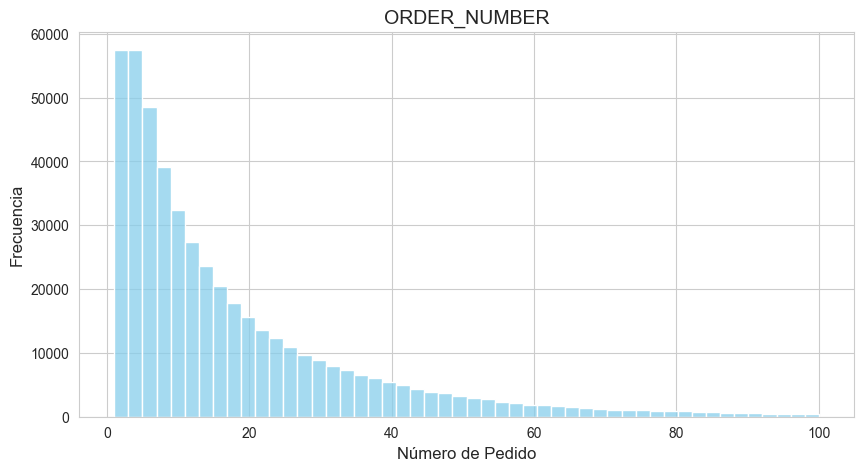

In [14]:
# Crear el histograma de ORDER_NUMBER

sns.set_style("whitegrid")


plt.figure(figsize=(10, 5))
sns.histplot(df_instacart_orders['ORDER_NUMBER'], bins=50, kde=False, color='skyblue')

plt.xlabel('Número de Pedido', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('ORDER_NUMBER', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

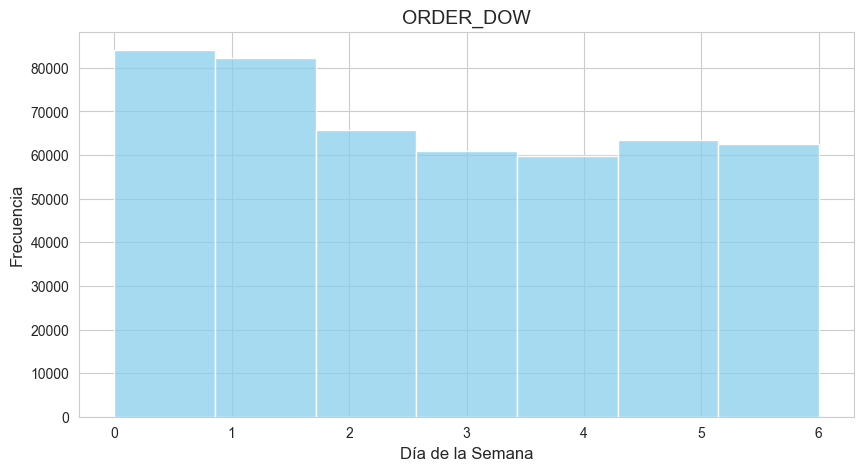

In [15]:
# Crear el histograma de ORDER_DOW
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_instacart_orders['ORDER_DOW'], bins=7, kde=False, color='skyblue')

plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('ORDER_DOW', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

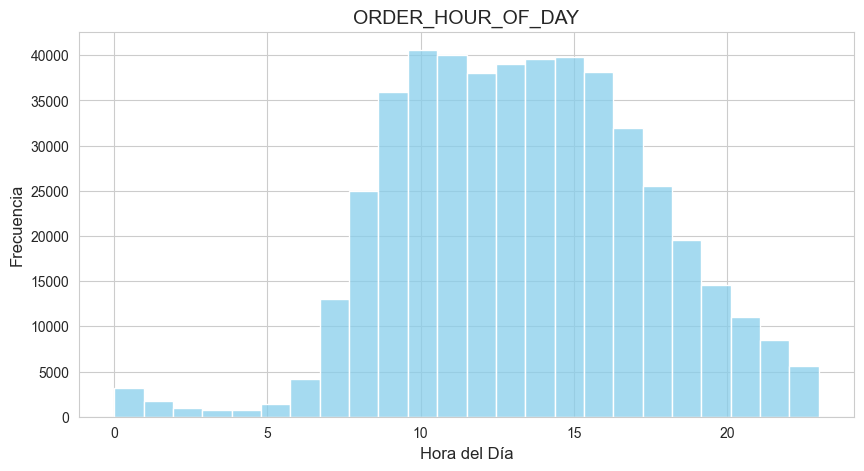

In [16]:
# Crear el histograma de ORDER_HOUR_OF_DAY
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_instacart_orders['ORDER_HOUR_OF_DAY'], bins=24, kde=False, color='skyblue')

plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('ORDER_HOUR_OF_DAY', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

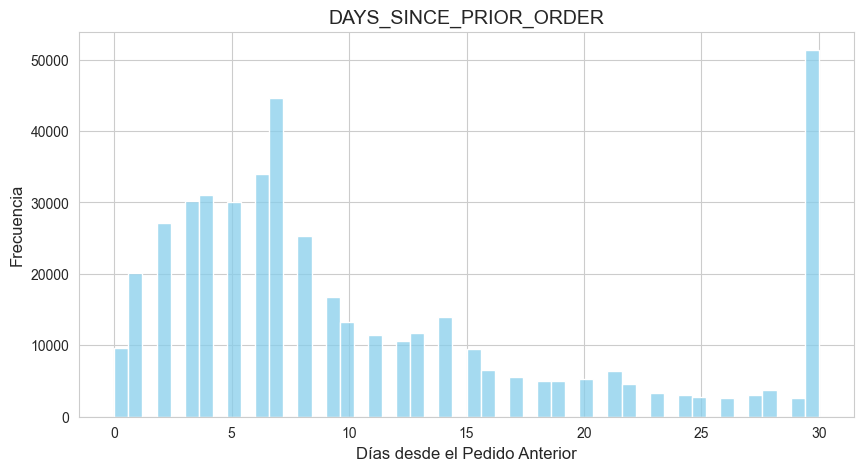

In [17]:
# Crear el histograma de DAYS_SINCE_PRIOR_ORDER
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'], bins=50, kde=False, color='skyblue')

plt.xlabel('Días desde el Pedido Anterior', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('DAYS_SINCE_PRIOR_ORDER', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

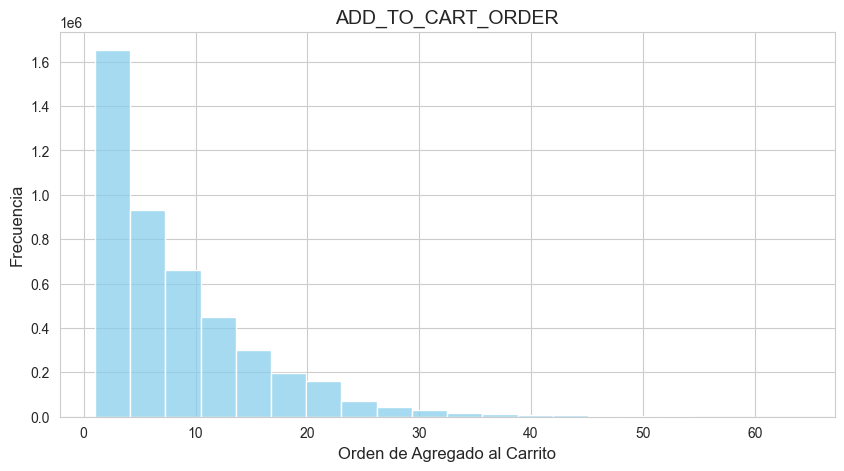

In [18]:
# Crear el histograma de ADD_TO_CART_ORDER
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_order_products['ADD_TO_CART_ORDER'], bins=20, kde=False, color='skyblue')

plt.xlabel('Orden de Agregado al Carrito', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('ADD_TO_CART_ORDER', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

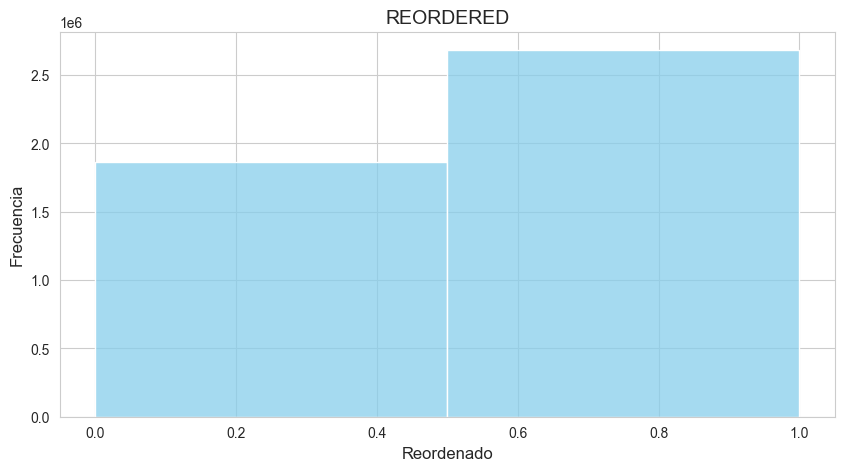

In [19]:
# Crear el histograma de REORDERED
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_order_products['REORDERED'], bins=2, kde=False, color='skyblue')

plt.xlabel('Reordenado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('REORDERED', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

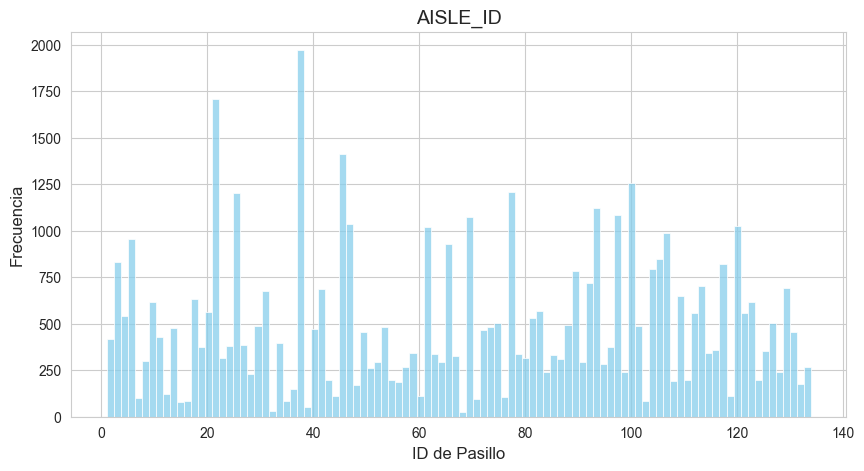

In [20]:
# Crear el histograma de AISLE_ID
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_products['AISLE_ID'], bins=100, kde=False, color='skyblue')

plt.xlabel('ID de Pasillo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('AISLE_ID', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


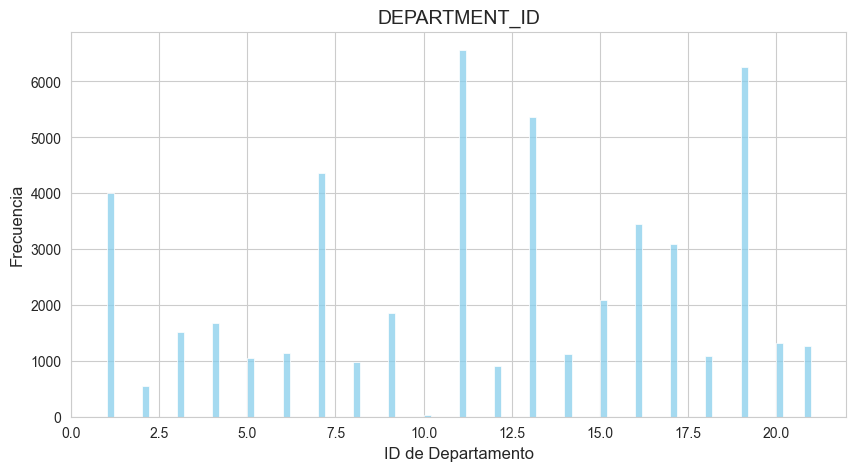

In [21]:
# Crear el histograma de DEPARTMENT_ID
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df_products['DEPARTMENT_ID'], bins=100, kde=False, color='skyblue')

plt.xlabel('ID de Departamento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('DEPARTMENT_ID', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Problemas de calidad

### Datos Ausentes

In [22]:
# Datos ausentes
print('aisles\n', df_aisles.isnull().sum())


aisles
 AISLE_ID    0
AISLE       0
dtype: int64


In [23]:
print('departments\n', df_departments.isnull().sum())


departments
 DEPARTMENT_ID    0
DEPARTMENT       0
dtype: int64


In [24]:
print('instacart_orders\n', df_instacart_orders.isnull().sum())

instacart_orders
 ORDER_ID                      0
USER_ID                       0
ORDER_NUMBER                  0
ORDER_DOW                     0
ORDER_HOUR_OF_DAY             0
DAYS_SINCE_PRIOR_ORDER    28819
dtype: int64


In [25]:
print('order_products\n', df_order_products.isnull().sum())


order_products
 ORDER_ID               0
PRODUCT_ID             0
ADD_TO_CART_ORDER    836
REORDERED              0
dtype: int64


In [26]:
print('products\n', df_products.isnull().sum())

products
 PRODUCT_ID          0
PRODUCT_NAME     1258
AISLE_ID            0
DEPARTMENT_ID       0
dtype: int64


In [38]:
# Analisis nulos Instacart Orders
# Imprime los registros con ORDER_NUMBER de 1
df_instacart_orders[df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'].isna()]

,ORDER_ID,USER_ID,ORDER_NUMBER,ORDER_DOW,ORDER_HOUR_OF_DAY,DAYS_SINCE_PRIOR_ORDER
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [39]:
print('Registros con ORDER_NUMBER de 1\n', df_instacart_orders[df_instacart_orders['ORDER_NUMBER'] == 1])
df_instacart_orders[df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'].isna()].query('ORDER_NUMBER != 1')


Registros con ORDER_NUMBER de 1
         ORDER_ID  USER_ID  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_DAY  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        DAYS_SINCE_PRIOR_ORDER  
28                         NaN  
96                      

,ORDER_ID,USER_ID,ORDER_NUMBER,ORDER_DOW,ORDER_HOUR_OF_DAY,DAYS_SINCE_PRIOR_ORDER


Se nota que los valores con ORDER_NUMBER 1 tienen NaN

In [34]:
# analisis nulos Order Products
print(df_order_products['ADD_TO_CART_ORDER'].unique())


[21.  5. 20. 24. 15.  3.  9. 34. 10.  6. 19.  2.  7.  1. 36. 12. 13. 17.
 33. 14.  4. 11. 18.  8. 16. 25. 22. 26. 42. 28. 27. 29. 35. 30. 23. 31.
 41. nan 32. 38. 54. 52. 49. 40. 37. 39. 58. 53. 51. 59. 45. 43. 55. 47.
 48. 46. 56. 44. 63. 50. 60. 62. 57. 61. 64.]


In [35]:
df_order_products[df_order_products['ADD_TO_CART_ORDER'].isna()]

,ORDER_ID,PRODUCT_ID,ADD_TO_CART_ORDER,REORDERED
726,1717990,37766,NaN,1
7750,293169,23233,NaN,1
10489,61355,47269,NaN,0
12360,1386261,29454,NaN,0
20920,2721963,5322,NaN,0
...,...,...,...,...
4531181,102236,47717,NaN,0
4531925,61355,29660,NaN,0
4535380,3125735,4756,NaN,1
4537186,3308010,42265,NaN,1


- No se registró en qué posición se agregó el producto.
- Algo falló en la recopilación de información.

In [43]:
# analisis nulos Products
df_products[df_products['PRODUCT_NAME'].isna()]

,PRODUCT_ID,PRODUCT_NAME,AISLE_ID,DEPARTMENT_ID
37,38,None,100,21
71,72,None,100,21
109,110,None,100,21
296,297,None,100,21
416,417,None,100,21
...,...,...,...,...
49552,49553,None,100,21
49574,49575,None,100,21
49640,49641,None,100,21
49663,49664,None,100,21


In [45]:
df_products[df_products['PRODUCT_NAME'].isna()].query('AISLE_ID != 100')

,PRODUCT_ID,PRODUCT_NAME,AISLE_ID,DEPARTMENT_ID


In [46]:
df_products[df_products['PRODUCT_NAME'].isna()].query('DEPARTMENT_ID != 21')

,PRODUCT_ID,PRODUCT_NAME,AISLE_ID,DEPARTMENT_ID


In [47]:
df_aisles[df_aisles['AISLE_ID'] == 100]

,AISLE_ID,AISLE
99,100,missing


In [48]:
df_departments[df_departments['DEPARTMENT_ID'] == 21]

,DEPARTMENT_ID,DEPARTMENT
20,21,missing


Se nota que los valores dentro de missing en aisel y department tienen none en product_name

### Registros duplicados

In [49]:
# Ver registros duplicados
print('aisles\n', df_aisles[df_aisles.duplicated()])
print('departments\n', df_departments[df_departments.duplicated()])
print('instacart_orders\n', df_instacart_orders[df_instacart_orders.duplicated()])
print('order_products\n', df_order_products[df_order_products.duplicated()])
print('products\n', df_products[df_products.duplicated()])

aisles
 Empty DataFrame
Columns: [AISLE_ID, AISLE]
Index: []
departments
 Empty DataFrame
Columns: [DEPARTMENT_ID, DEPARTMENT]
Index: []
instacart_orders
         ORDER_ID  USER_ID  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_DAY  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19   

In [55]:
# duplicados en instacart_orders
print(len(df_instacart_orders[df_instacart_orders.duplicated()]))
print(len(df_instacart_orders[df_instacart_orders['ORDER_ID'].duplicated()]))


15
15


In [74]:
print('order_products\n', df_order_products[df_order_products.duplicated()])

order_products
 Empty DataFrame
Columns: [ORDER_ID, PRODUCT_ID, ADD_TO_CART_ORDER, REORDERED]
Index: []


### Inconsistencias en tipos de datos

In [57]:
# Mirar las inconsitencias de datos
print('aisles\n', df_aisles.dtypes)
print('departments\n', df_departments.dtypes)
print('instacart_orders\n', df_instacart_orders.dtypes)
print('order_products\n', df_order_products.dtypes)
print('products\n', df_products.dtypes)


aisles
 AISLE_ID     int64
AISLE       object
dtype: object
departments
 DEPARTMENT_ID     int64
DEPARTMENT       object
dtype: object
instacart_orders
 ORDER_ID                    int64
USER_ID                     int64
ORDER_NUMBER                int64
ORDER_DOW                   int64
ORDER_HOUR_OF_DAY           int64
DAYS_SINCE_PRIOR_ORDER    float64
dtype: object
order_products
 ORDER_ID               int64
PRODUCT_ID             int64
ADD_TO_CART_ORDER    float64
REORDERED              int64
dtype: object
products
 PRODUCT_ID        int64
PRODUCT_NAME     object
AISLE_ID          int64
DEPARTMENT_ID     int64
dtype: object


In [59]:
# Filtrar valores no nulos antes de verificar si tienen decimales
print(df_instacart_orders[df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'].notna() & 
                          (df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'] % 1 != 0)])

print(df_order_products[df_order_products['ADD_TO_CART_ORDER'].notna() & 
                        (df_order_products['ADD_TO_CART_ORDER'] % 1 != 0)])


Empty DataFrame
Columns: [ORDER_ID, USER_ID, ORDER_NUMBER, ORDER_DOW, ORDER_HOUR_OF_DAY, DAYS_SINCE_PRIOR_ORDER]
Index: []
Empty DataFrame
Columns: [ORDER_ID, PRODUCT_ID, ADD_TO_CART_ORDER, REORDERED]
Index: []


### Valores Atípicos

In [60]:
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

In [64]:
# Insta cart orders
df_instacart_orders_outliers = detectar_outliers_iqr(df_instacart_orders, 'ORDER_NUMBER')
print('ORDER_NUMBER\n', df_instacart_orders_outliers)

ORDER_NUMBER
         ORDER_ID  USER_ID  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_DAY  \
3        1768857    82516            56          0                 20   
18        556588     6801            63          5                 11   
43        698527    95296            58          3                 14   
66       3335598   183111            86          3                 15   
92         60724   110808            78          0                 10   
...          ...      ...           ...        ...                ...   
478911   2599766   123746            74          6                 14   
478929    658949   205899            86          5                 14   
478936    256670    60258            68          0                 16   
478937    558491     3418            54          1                 17   
478948   2488306    68875            79          0                  9   

        DAYS_SINCE_PRIOR_ORDER  
3                         10.0  
18                         7.0  
43        

In [65]:
df_instacart_orders_outliers = detectar_outliers_iqr(df_instacart_orders, 'ORDER_DOW')
print('ORDER_DOW\n', df_instacart_orders_outliers)

ORDER_DOW
 Empty DataFrame
Columns: [ORDER_ID, USER_ID, ORDER_NUMBER, ORDER_DOW, ORDER_HOUR_OF_DAY, DAYS_SINCE_PRIOR_ORDER]
Index: []


In [66]:
df_instacart_orders_outliers = detectar_outliers_iqr(df_instacart_orders, 'ORDER_HOUR_OF_DAY')
print('ORDER_HOUR_OF_DAY\n', df_instacart_orders_outliers)

ORDER_HOUR_OF_DAY
         ORDER_ID  USER_ID  ORDER_NUMBER  ORDER_DOW  ORDER_HOUR_OF_DAY  \
23       3406282    19356            21          0                  0   
155       957214   111483            15          1                  0   
524      3084302   132558            21          6                  0   
639      3156097    38798            34          6                  0   
886       983672    53782            23          0                  0   
...          ...      ...           ...        ...                ...   
477530   1530369   102815             6          1                  0   
478053    686269     9959             9          2                  0   
478054   1879829    56767             8          6                  0   
478363   1573132    45639            30          5                  0   
478643   2069537   162929            18          2                  0   

        DAYS_SINCE_PRIOR_ORDER  
23                        14.0  
155                        9.0  
524  

In [67]:
df_instacart_orders_outliers = detectar_outliers_iqr(df_instacart_orders, 'DAYS_SINCE_PRIOR_ORDER')
print('DAYS_SINCE_PRIOR_ORDER\n', df_instacart_orders_outliers)

DAYS_SINCE_PRIOR_ORDER
 Empty DataFrame
Columns: [ORDER_ID, USER_ID, ORDER_NUMBER, ORDER_DOW, ORDER_HOUR_OF_DAY, DAYS_SINCE_PRIOR_ORDER]
Index: []


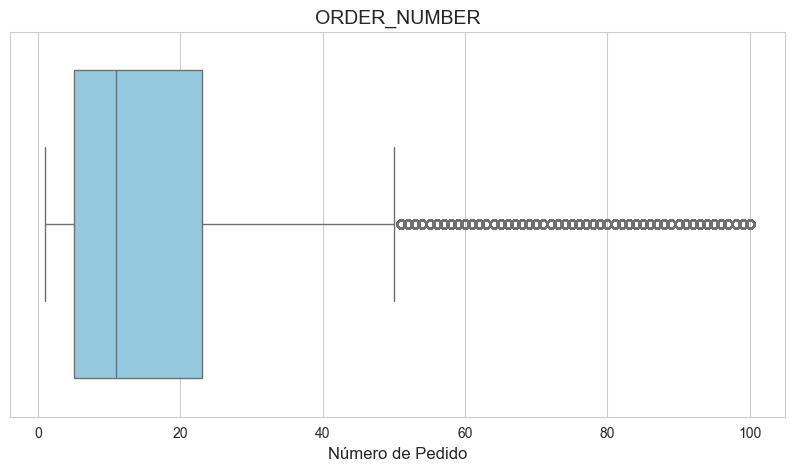

In [69]:
# Boxplot para ORDER_NUMBER
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x='ORDER_NUMBER', data=df_instacart_orders, color='skyblue')

plt.xlabel('Número de Pedido', fontsize=12)
plt.title('ORDER_NUMBER', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

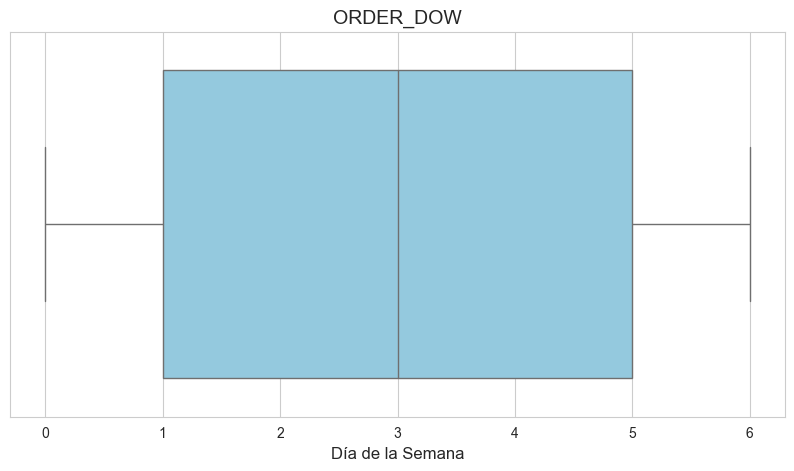

In [70]:
# Boxplot para ORDER_DOW
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x='ORDER_DOW', data=df_instacart_orders, color='skyblue')

plt.xlabel('Día de la Semana', fontsize=12)
plt.title('ORDER_DOW', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [71]:
# order_products
df_order_products_outliers = detectar_outliers_iqr(df_order_products, 'ADD_TO_CART_ORDER')
print('ADD_TO_CART_ORDER\n', df_order_products_outliers)

ADD_TO_CART_ORDER
          ORDER_ID  PRODUCT_ID  ADD_TO_CART_ORDER  REORDERED
4         2049210       36389               24.0          1
9         1459225       19156               34.0          0
19        1248338       31066               36.0          0
35         400595       46226               33.0          0
86        2304774       34358               25.0          1
...           ...         ...                ...        ...
4544925     58307        8415               32.0          0
4544926   1821952       14678               25.0          0
4544955   1722011       32927               45.0          0
4544986    448886       32605               24.0          1
4545001    330351       39442               29.0          0

[190971 rows x 4 columns]


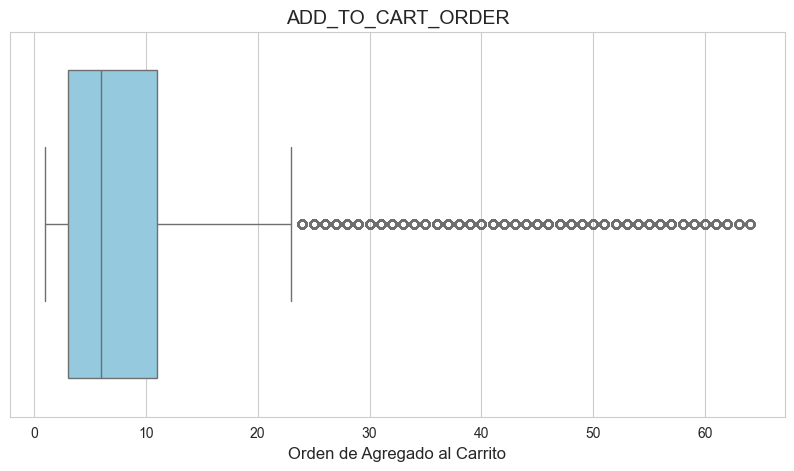

In [72]:
# boxplot para ADD_TO_CART_ORDER
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(x='ADD_TO_CART_ORDER', data=df_order_products, color='skyblue')

plt.xlabel('Orden de Agregado al Carrito', fontsize=12)
plt.title('ADD_TO_CART_ORDER', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Conclusiones

En la tabla INSTACART_ORDERS, la columna DAYS_SINCE_PRIOR_ORDER tiene 28819 valores nulos.
En la tabla ORDER_PRODUCTS, la columna ADD_TO_CART_ORDER tiene 836 valores nulos.
En la tabla PRODUCTS, la columna PRODUCT_NAME tiene 1258 valores nulos. 

Se encontraron 15 registros duplicados en la tabla INSTACART_ORDERS.
No se encontraron duplicados en las demás tablas.

DAYS_SINCE_PRIOR_ORDER y ADD_TO_CART_ORDER deberían ser enteros (int), pero aparecen como float, lo que puede indicar valores incorrectos.

ORDER_NUMBER y ADD_TO_CART_ORDER parecen tener valorees outliers, pero en mi opinión no lo son.
La mayoría de las órdenes ocurren entre las 9:00 y las 16:00 horas.
Los pedidos más frecuentes ocurren entre el día 0 y el día 7 desde la última compra.

### Valores Esperados

In [81]:
df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'] = df_instacart_orders['DAYS_SINCE_PRIOR_ORDER'].fillna(0)
df_instacart_orders

,ORDER_ID,USER_ID,ORDER_NUMBER,ORDER_DOW,ORDER_HOUR_OF_DAY,DAYS_SINCE_PRIOR_ORDER
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [80]:
df_order_products = df_order_products.dropna(subset=['ADD_TO_CART_ORDER'])
df_order_products

,ORDER_ID,PRODUCT_ID,ADD_TO_CART_ORDER,REORDERED
0,3014714,29805,21.0,1
1,1626538,47766,5.0,1
2,1785042,42460,20.0,0
3,2894562,35951,5.0,1
4,2049210,36389,24.0,1
...,...,...,...,...
4545002,2708004,40145,2.0,1
4545003,1608534,27966,3.0,1
4545004,135749,13834,2.0,1
4545005,2000291,24964,3.0,1


In [82]:
df_products

,PRODUCT_ID,PRODUCT_NAME,AISLE_ID,DEPARTMENT_ID
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11
